#### Error rates


In [1]:
L = len("""This is a text message that is 100 bytes in length qwertyuiopasdfghjklzxcvbnm1234567890`~!@#$%^&*()-""") #100

def accuracy(msg):
    return len(msg) / L

In [2]:
import numpy as np

lns = open("test.txt","r").readlines()
acc = list()

for i in range(0,len(lns),5):
    if i in [10,20]: continue #skip duplicate runs
    slc = lns[i:i+5]
    mean = np.mean([accuracy(msg.strip()) for msg in slc])
    acc.append(mean)

#I noticed I had repeated runs for 10000 and 1000

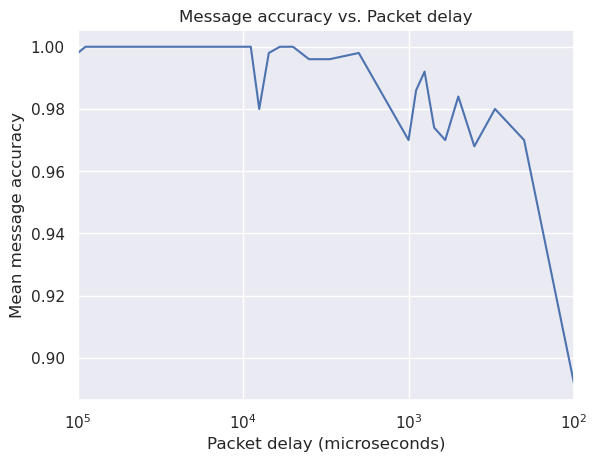

In [12]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_theme()

df = pd.read_csv("results.csv")

ax = sns.lineplot(x=df.delay, y=acc)
ax.set_xlim(100000,100)
plt.ylabel("Mean message accuracy")
plt.xlabel("Packet delay (microseconds)")
plt.xscale("log")
plt.title("Message accuracy vs. Packet delay")
plt.show()

In [13]:
df["capacity"] = 100 / df.time

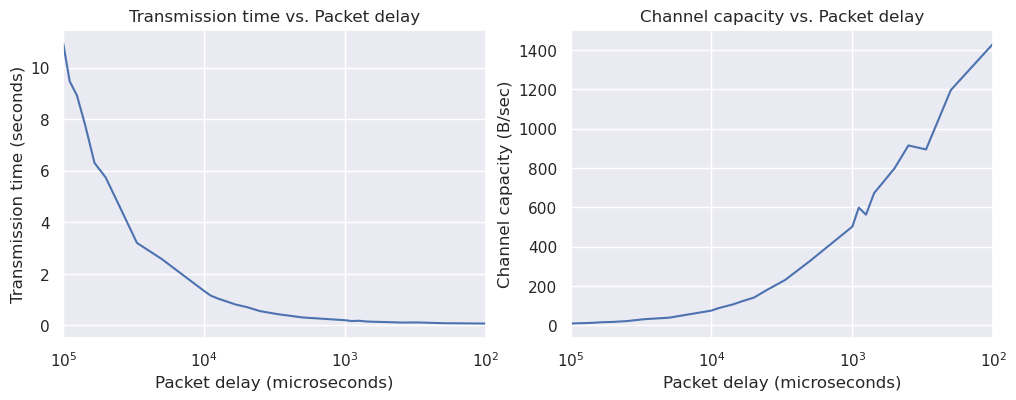

In [18]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
ax = sns.lineplot(x=df.delay, y=df.time)
ax.set_xlim(100000,100)
plt.ylabel("Transmission time (seconds)")
plt.xlabel("Packet delay (microseconds)")
plt.xscale("log")
plt.title("Transmission time vs. Packet delay")

plt.subplot(1,2,2)
ax = sns.lineplot(x=df.delay, y=df.capacity)
ax.set_xlim(100000,100)
plt.ylabel("Channel capacity (B/sec)")
plt.xlabel("Packet delay (microseconds)")
plt.xscale("log")
plt.title("Channel capacity vs. Packet delay")
plt.show()

In [21]:
df.to_csv("processed_results.csv")